In [1]:
#library
import nltk
import csv
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

MENAMBAH DATA STOP WORD

In [2]:
#update data stopwords
stopset = set(stopwords.words('indonesian'))
stopset.update(['kirim','kabar','lindung','tulis', 'sulaiman', 'lingkar', 'nabi', 'maut', 'sihir', 'tiada', 'zakat',
                'mohon', 'gelap','hijrah', 'durhaka','panggang', 'pegang', 'cucu', 'diridhai','kasar', 'sekira', 'ganggu',
                'kiri', 'untung', 'laki', 'ber', 'tinggal', 'jalan','taubat', 'maryam', 'nama', 'tanah', 'timur', 'nafkah',
                'air', 'penjuru', 'salah', 'halilintar', 'tumpah', 'kiamat', 'gelombang', 'panas', 'aneh',
                'alir', 'tanda', 'barangsiapa', 'muka', 'merdeka', 'wafat', 'anugerah', 'tangguh','daya', 'pakai', 'terang', 
                'selamat', 'ltulah', 'jannah', 'zalim','cinta', 'semesta', 'baca', 'sungai', 'kelak', 'sapi', 'penggal', 'tekan',
                'aniaya', 'kepala', 'isterinya','ayat','syafa','maha','jika','nya','orang','kurangnya','berkali','kali','mata',
                'olah','sekurang', 'setidak', 'tama', 'tidaknya','al','quran', 'allah','kitab','simpang','sungguh',
                'bawa','selisih','gembira','izin','musuh','barang','ampun','hitung','kuasa','lahir','langit','niscaya',
                'sembunyi','hati','saksi','bapa','biarpun','enggan','hawa','kaum','kaya','kerja','maslahat','hadap','miskin',
                'nafsu','putar','tegak','kerabat','kecuali','nyala','balas','ikrar','isterimu', 'hina', 'bahagian', 'luas', 
                'kunci','tenhadap', 'lalai', 'engkau', 'saudara', 'tukang','rupa','sisi', 'manfaat', 'shalat', 
                'kafir', 'bisik','ambil', 'guruh', 'seraya', 'kenan', 'tukar','ma', 'jahannam', 'lbrahim', 'sebahagian', 
                'daging', 'tuang','pergi', 'pecah', 'asa','batu', 'kanan', 'bicara', 'cita', 'angkuh', 'marut', 'ahli', 
                'ilmu', 'henti','rusa', 'tipu', 'putus', 'sodom', 'pikul', 'duniawi', 'bima', 'perintah', 
                'laku', 'raja', 'laksana', 'suami', 'giring', 'utus', 'harta', 'derita', 'ilah', 'tatkala', 'usaha',
                'muhammad', 'barat', 'api', 'saqar', 'tuhan', 'tindas', 'tahan', 'serah','kalimat','hancur', 'awas', 'kam',
                'junjung', 'lepas', 'kuat', 'tolak', 'maksiat', 'alas','hujan', 'dengar', 'sambut', 'makan', 'tolong', 
                'dahsyat', 'seru', 'hai', 'ya', 'makhluk', 'seungguhnya', 'jelma', 'ajar', 'dusta', 'sembah', 'seret', 
                'punggung','salaam', 'bijaksana', 'bentuk', 'senang', 'sembilan', 'bahtera', 'waris', 'akhirat', 'hak', 'bershalawatlah', 
                'surga', 'jiwa', 'alangkah', 'luth', 'duka', 'susah', 'toleh', 'alam', 'sedia', 'panggil', 'hamba', 'mati', 'beda', 
                 'cepat', 'keliling', 'mekah', 'angin', 'berhala', 'hormat', 'sempit', 'ragu', 'keburu', 'darah', 'mudharat', 
                'nikmat', 'usia', 'wajah', 'dosa', 'jatuh', 'gilir', 'suara', 'cela', 'bakar', 'pilih', 'bathil', 'puteramu', 
                'kenal', 'belah', 'subuh', 'yatim', 'bencana', 'musa', 'binasa', 'puji', 'sisa', 'wajib', 'jahat', 'dada', 'belas',
                'kebaji', 'jamah', 'arsy', 'keras', 'tunggu', 'serahi', 'dikurniakan', 'manusia', 'yahya', 'biar', 'bahan', 'sakit',
                'timpa', 'sahaya', 'roh','neraka', 'khalifah', 'anak', 'bala', 'lihat', 'murah', 
                'negeri', 'tabut', 'urus', 'mahfuzh', 'matahari', 'firman', 'rubah', 'hidup', 'sedih', 'umpama', 'shabartum',
                'musafir', 'cerai', 'guntur', 'gua', 'amal', 'arah', 'sayang', 'salam', 'salamun', 'sesat',
                'bahaya', 'sejahtera', 'tenteram', 'terima', 'wanita', 'aman', 'atur', 'alaikum', 'terbit', 'takut',
                'cerita', 'delapan', 'beril', 'kabut', 'adn', 'sulit', 'teman', 'hadir', 'masuk',
                'bantu', 'buruk', 'musyrik', 'leher', 'tabir', 'lupa', 'harut', 'rahasia', 'condong', 'coba', 'janji', 'usir', 
                'bilang', 'duduk', 'azab', 'martabat', 'tunai', 'pintu', 'jari', 'cipta', 'putera', 'sempurna', 'serang',
                'sombong', 'aikat', 'isa', 'lenyap', 'tamu', 'urat', 'jual', 'ingkar', 'musyrikin', 'tangan',
                'kota', 'lata', 'pandang', 'letih', 'jemu', 'putih', 'mu', 'keluarga', 'ira', 'ishak', 'tenggelam', 
                'pancung', 'tenang', 'senantiasa', 'harun', 'topan', 'ujung', 'lauh', 'dendam', 'ngeri', 'rendah', 'menang', 'larang', 
                'lempar', 'terbang', 'liput', 'pelihara', 'perempuan'])

MEMBACA DATA CSV

In [3]:
#membaca file csv data malikat
posts = pd.read_csv(open('data_malaikat2.csv', newline='', encoding='utf-8'), delimiter=';')

MENAMPILKAN ISI DATA CSV

In [4]:
#menampilkan dari fle csv
print (posts.shape)
posts.head(10)

(142, 3)


,Surah,Ayat,Terjemahan
0,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,..."
1,2,98,"Barang siapa yang menjadi musuh Allah, malaika..."
2,2,177,Bukanlah menghadapkan wajahmu ke arah timur da...
3,2,285,Rasul telah beriman kepada Al Quran yang ditur...
4,4,136,"Wahai orang-orang yang beriman, tetaplah berim..."
5,37,164,Tiada seorangpun di antara kami (malaikat) mel...
6,6,61,Dan Dialah yang mempunyai kekuasaan tertinggi ...
7,11,70,Maka tatkala dilihatnya tangan mereka tidak me...
8,13,13,"Dan guruh itu bertasbih dengan memuji Allah, (..."
9,15,62,"ia berkata: ""Sesungguhnya kamu adalah orang-or..."


In [5]:
#menamplkan nama index kolom csv
print (list(posts))

['Surah', 'Ayat', 'Terjemahan']


In [6]:
#menamplkan isi nama index kolom tertentu csv
example_review = posts.iloc[0]
print(example_review['Terjemahan'])

(yaitu) mereka yang beriman kepada yang ghaib, yang mendirikan shalat, dan menafkahkan sebahagian rezeki yang Kami anugerahkan kepada mereka.


PROSES PREPROSESING DATA CSV

In [7]:
#proses tokenizng
def identify_tokens(row):
    review = row['Terjemahan']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens]
    return token_words

posts['tokenizing_word'] = posts.apply(identify_tokens, axis=1)

In [8]:
#proses stemming
def stem_list(row):
    my_list = row['tokenizing_word']
    stemmed_list = [stemmer.stem(word) for word in my_list]
    return (stemmed_list)

posts['stemming_word'] = posts.apply(stem_list, axis=1)

In [9]:
#proses Alpha
def is_alpha(row):
    my_alpha = row['stemming_word']
    is_alpha = [word for word in my_alpha if word.isalpha()]
    return (is_alpha)

posts['panctuaton_word'] = posts.apply(is_alpha, axis=1)

In [10]:
#proses stopwords
def remove_stops(row):
    my_list = row['panctuaton_word']
    meaningful_words = [w for w in my_list if not w in stopset]
    return (meaningful_words)

posts['stopword_word'] = posts.apply(remove_stops, axis=1)

In [11]:
#joinkan terjemahan
def rejoin_words(row):
    my_list = row['stopword_word']
    joined_words = ( " ".join(my_list))
    return joined_words

posts['processed'] = posts.apply(rejoin_words, axis=1)

MENAMPILKAN HASIL PREPROSESING

In [12]:
#tampilkan terjemahan
terjemahan=posts
terjemahan

,Surah,Ayat,Terjemahan,tokenizing_word,stemming_word,panctuaton_word,stopword_word,processed
0,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,...","[(, yaitu, ), mereka, yang, beriman, kepada, y...","[, yaitu, , mereka, yang, iman, kepada, yang, ...","[yaitu, mereka, yang, iman, kepada, yang, ghai...","[iman, ghaib, rezeki]",iman ghaib rezeki
1,2,98,"Barang siapa yang menjadi musuh Allah, malaika...","[Barang, siapa, yang, menjadi, musuh, Allah, ,...","[barang, siapa, yang, jadi, musuh, allah, , ma...","[barang, siapa, yang, jadi, musuh, allah, mala...","[malaikat, rasul, jibril, mikail]",malaikat rasul jibril mikail
2,2,177,Bukanlah menghadapkan wajahmu ke arah timur da...,"[Bukanlah, menghadapkan, wajahmu, ke, arah, ti...","[bukan, hadap, wajah, ke, arah, timur, dan, ba...","[bukan, hadap, wajah, ke, arah, timur, dan, ba...","[iman, malaikat, sabar, peperangan, iman, takwa]",iman malaikat sabar peperangan iman takwa
3,2,285,Rasul telah beriman kepada Al Quran yang ditur...,"[Rasul, telah, beriman, kepada, Al, Quran, yan...","[rasul, telah, iman, kepada, al, quran, yang, ...","[rasul, telah, iman, kepada, al, quran, yang, ...","[rasul, iman, turun, iman, iman, malaikat, ras...",rasul iman turun iman iman malaikat rasul rasu...
4,4,136,"Wahai orang-orang yang beriman, tetaplah berim...","[Wahai, orang-orang, yang, beriman, ,, tetapla...","[wahai, orang, yang, iman, , tetap, iman, kepa...","[wahai, orang, yang, iman, tetap, iman, kepada...","[iman, iman, rasul, turun, rasul, turun, malai...",iman iman rasul turun rasul turun malaikat rasul
...,...,...,...,...,...,...,...,...
137,82,12,mereka mengetahui apa yang kamu kerjakan.,"[mereka, mengetahui, apa, yang, kamu, kerjakan...","[mereka, tahu, apa, yang, kamu, kerja, ]","[mereka, tahu, apa, yang, kamu, kerja]",[],
138,83,21,yang disaksikan oleh malaikat-malaikat yang di...,"[yang, disaksikan, oleh, malaikat-malaikat, ya...","[yang, saksi, oleh, malaikat, yang, dekat, , k...","[yang, saksi, oleh, malaikat, yang, dekat, kep...",[malaikat],malaikat
139,86,4,tidak ada suatu jiwapun (diri) melainkan ada p...,"[tidak, ada, suatu, jiwapun, (, diri, ), melai...","[tidak, ada, suatu, jiwa, , diri, , lain, ada,...","[tidak, ada, suatu, jiwa, diri, lain, ada, jaga]",[jaga],jaga
140,96,18,"kelak Kami akan memanggil malaikat Zabaniyah,","[kelak, Kami, akan, memanggil, malaikat, Zaban...","[kelak, kami, akan, panggil, malaikat, zabaniy...","[kelak, kami, akan, panggil, malaikat, zabaniyah]","[malaikat, zabaniyah]",malaikat zabaniyah


In [13]:
#menghitung baris kosong
count=0
for baris in posts["processed"]:
    if baris == " ":
        count+=1
        print(count)

MEMBUAT BOW DARI KESELURUHAN DATA CSV

In [14]:
#gabung terjemahan untuk membuat Bag Of Word
Bow= " ".join(posts["processed"])
#print(Bow)

In [15]:
#mengeset nilai Bow Menjadi Nol pada Gabungan Setiap Terjemahan
Bag_Of_Word = Bow.split(" ")
str_list = list(filter(None, Bag_Of_Word))
SetBow = set(str_list)
print(SetBow)
#print(ngeset1)
SetNull = dict.fromkeys(SetBow,0)
print(len(SetNull))

{'saleh', 'ibrahim', 'bumi', 'ribu', 'berita', 'sebar', 'zabaniyah', 'siksa', 'rombong', 'mulia', 'doa', 'sujud', 'tasbih', 'rasul', 'mikail', 'sabar', 'taat', 'takwa', 'adil', 'suci', 'ghaib', 'bakti', 'alim', 'iman', 'perkasa', 'tentara', 'suguh', 'cahaya', 'mihrab', 'rahmat', 'nyata', 'siang', 'dunia', 'malaikat', 'rezeki', 'babil', 'mukmin', 'sakratul', 'peperangan', 'bershalawat', 'teguh', 'kencang', 'ruh', 'malam', 'turun', 'zakariya', 'wahyu', 'nyawa', 'sayap', 'cabut', 'jibril', 'catat', 'jaga'}
53


In [16]:
pd.DataFrame(SetNull,index=posts["processed"])

,saleh,ibrahim,bumi,ribu,berita,sebar,zabaniyah,siksa,rombong,mulia,...,malam,turun,zakariya,wahyu,nyawa,sayap,cabut,jibril,catat,jaga
processed,,,,,,,,,,,,,,,,,,,,,
iman ghaib rezeki,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
malaikat rasul jibril mikail,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
iman malaikat sabar peperangan iman takwa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rasul iman turun iman iman malaikat rasul rasul taat doa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
iman iman rasul turun rasul turun malaikat rasul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
malaikat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jaga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


PROSES PENGHITUNGAN TF

In [17]:
#Menghitung Kemunculan BOW Kata
bowarray = []
for new in posts["processed"]:
    clean2 = new.split(" ")
    str_list1 = list(filter(None, clean2))
    setkosong2 = dict.fromkeys(str_list1,0)
    for word in str_list1:
        setkosong2[word]+=1
    bowarray.append(setkosong2)

In [18]:
#data csv set nool bow
from pandas import DataFrame
kata = DataFrame(bowarray, index=posts['processed'])
kata.fillna(0)

,iman,ghaib,rezeki,malaikat,rasul,jibril,mikail,sabar,peperangan,takwa,...,suguh,malam,alim,berita,siang,rombong,kencang,sebar,ruh,zabaniyah
processed,,,,,,,,,,,,,,,,,,,,,
iman ghaib rezeki,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
malaikat rasul jibril mikail,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iman malaikat sabar peperangan iman takwa,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rasul iman turun iman iman malaikat rasul rasul taat doa,3.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iman iman rasul turun rasul turun malaikat rasul,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
malaikat,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jaga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Menghitung tF BOW
arrayBOW = []
TF = { }
for new in posts["processed"]:
    clean3 = new.split(" ")
    str_list2 = list(filter(None, clean3))
    setkosong2 = dict.fromkeys(str_list2,0)
    panjang = len(str_list2)
    for word in str_list2:
        setkosong2[word]+=1/panjang
    arrayBOW.append(setkosong2)

MENAMPILKAN HASIL TF DARI BOW

In [20]:
#data csv tf
from pandas import DataFrame
tf = DataFrame(arrayBOW,index=posts["processed"])
tf.fillna(0)

,iman,ghaib,rezeki,malaikat,rasul,jibril,mikail,sabar,peperangan,takwa,...,suguh,malam,alim,berita,siang,rombong,kencang,sebar,ruh,zabaniyah
processed,,,,,,,,,,,,,,,,,,,,,
iman ghaib rezeki,0.333333,0.333333,0.333333,0.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
malaikat rasul jibril mikail,0.000000,0.000000,0.000000,0.250000,0.250,0.25,0.25,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iman malaikat sabar peperangan iman takwa,0.333333,0.000000,0.000000,0.166667,0.000,0.00,0.00,0.166667,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rasul iman turun iman iman malaikat rasul rasul taat doa,0.300000,0.000000,0.000000,0.100000,0.300,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iman iman rasul turun rasul turun malaikat rasul,0.250000,0.000000,0.000000,0.125000,0.375,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
malaikat,0.000000,0.000000,0.000000,1.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jaga,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PROSES PERHITUNGAN IDF

In [21]:
#mencari Nilai IDF
import math
arrayIDF = []

banyak_dokumen=len(posts["processed"])
termglobalfreq = {}
for term in SetNull:
    count = 0
    for new in posts["stopword_word"]:
        if term in new:
            count+=1
    if count > 0:
        termglobalfreq[term] = math.log10(banyak_dokumen/count)
    #log10(Banyak Data Dokumen Terjemahan/jumlah munculnya dokumen terjemahan terhadap trem)
arrayIDF.append(termglobalfreq)

In [22]:
#data csv idf
from pandas import DataFrame
idf = DataFrame(arrayIDF,index=["Dokumen"])
idf

,saleh,ibrahim,bumi,ribu,berita,sebar,zabaniyah,siksa,rombong,mulia,...,malam,turun,zakariya,wahyu,nyawa,sayap,cabut,jibril,catat,jaga
Dokumen,1.851258,1.152288,1.30719,1.675167,2.152288,2.152288,2.152288,1.374137,1.675167,1.453318,...,1.453318,0.948168,2.152288,1.374137,1.30719,2.152288,1.30719,1.249198,1.550228,1.30719


PROSES PERHITUNGAN TF-IDF

In [23]:
#Mencarikan TFIDF 
arrayTFIDF = []
for new in posts["processed"]:
    clean3 = new.split(" ")
    str_list2 = list(filter(None, clean3))
    setkosong2 = dict.fromkeys(str_list2,0)
    panjang = len(str_list2)
    for word in str_list2:
        setkosong2[word]+=1/panjang * termglobalfreq[word]
    arrayTFIDF.append(setkosong2)

In [24]:
#data csv tfidf
from pandas import DataFrame
tfidf = DataFrame(arrayTFIDF)
tfidf.fillna(0)

,iman,ghaib,rezeki,malaikat,rasul,jibril,mikail,sabar,peperangan,takwa,...,suguh,malam,alim,berita,siang,rombong,kencang,sebar,ruh,zabaniyah
0,0.335387,0.717429,0.717429,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.050725,0.343534,0.31230,0.538072,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.335387,0.000000,0.000000,0.033816,0.000000,0.00000,0.000000,0.279195,0.358715,0.308543,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.301848,0.000000,0.000000,0.020290,0.412241,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.251540,0.000000,0.000000,0.025362,0.515301,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
138,0.000000,0.000000,0.000000,0.202898,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
139,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
140,0.000000,0.000000,0.000000,0.101449,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.076144


VISUALISASI TF-IDF KE BAG OF WORD

Text(0.5, 0.98, 'Latent Smantic Analysis')

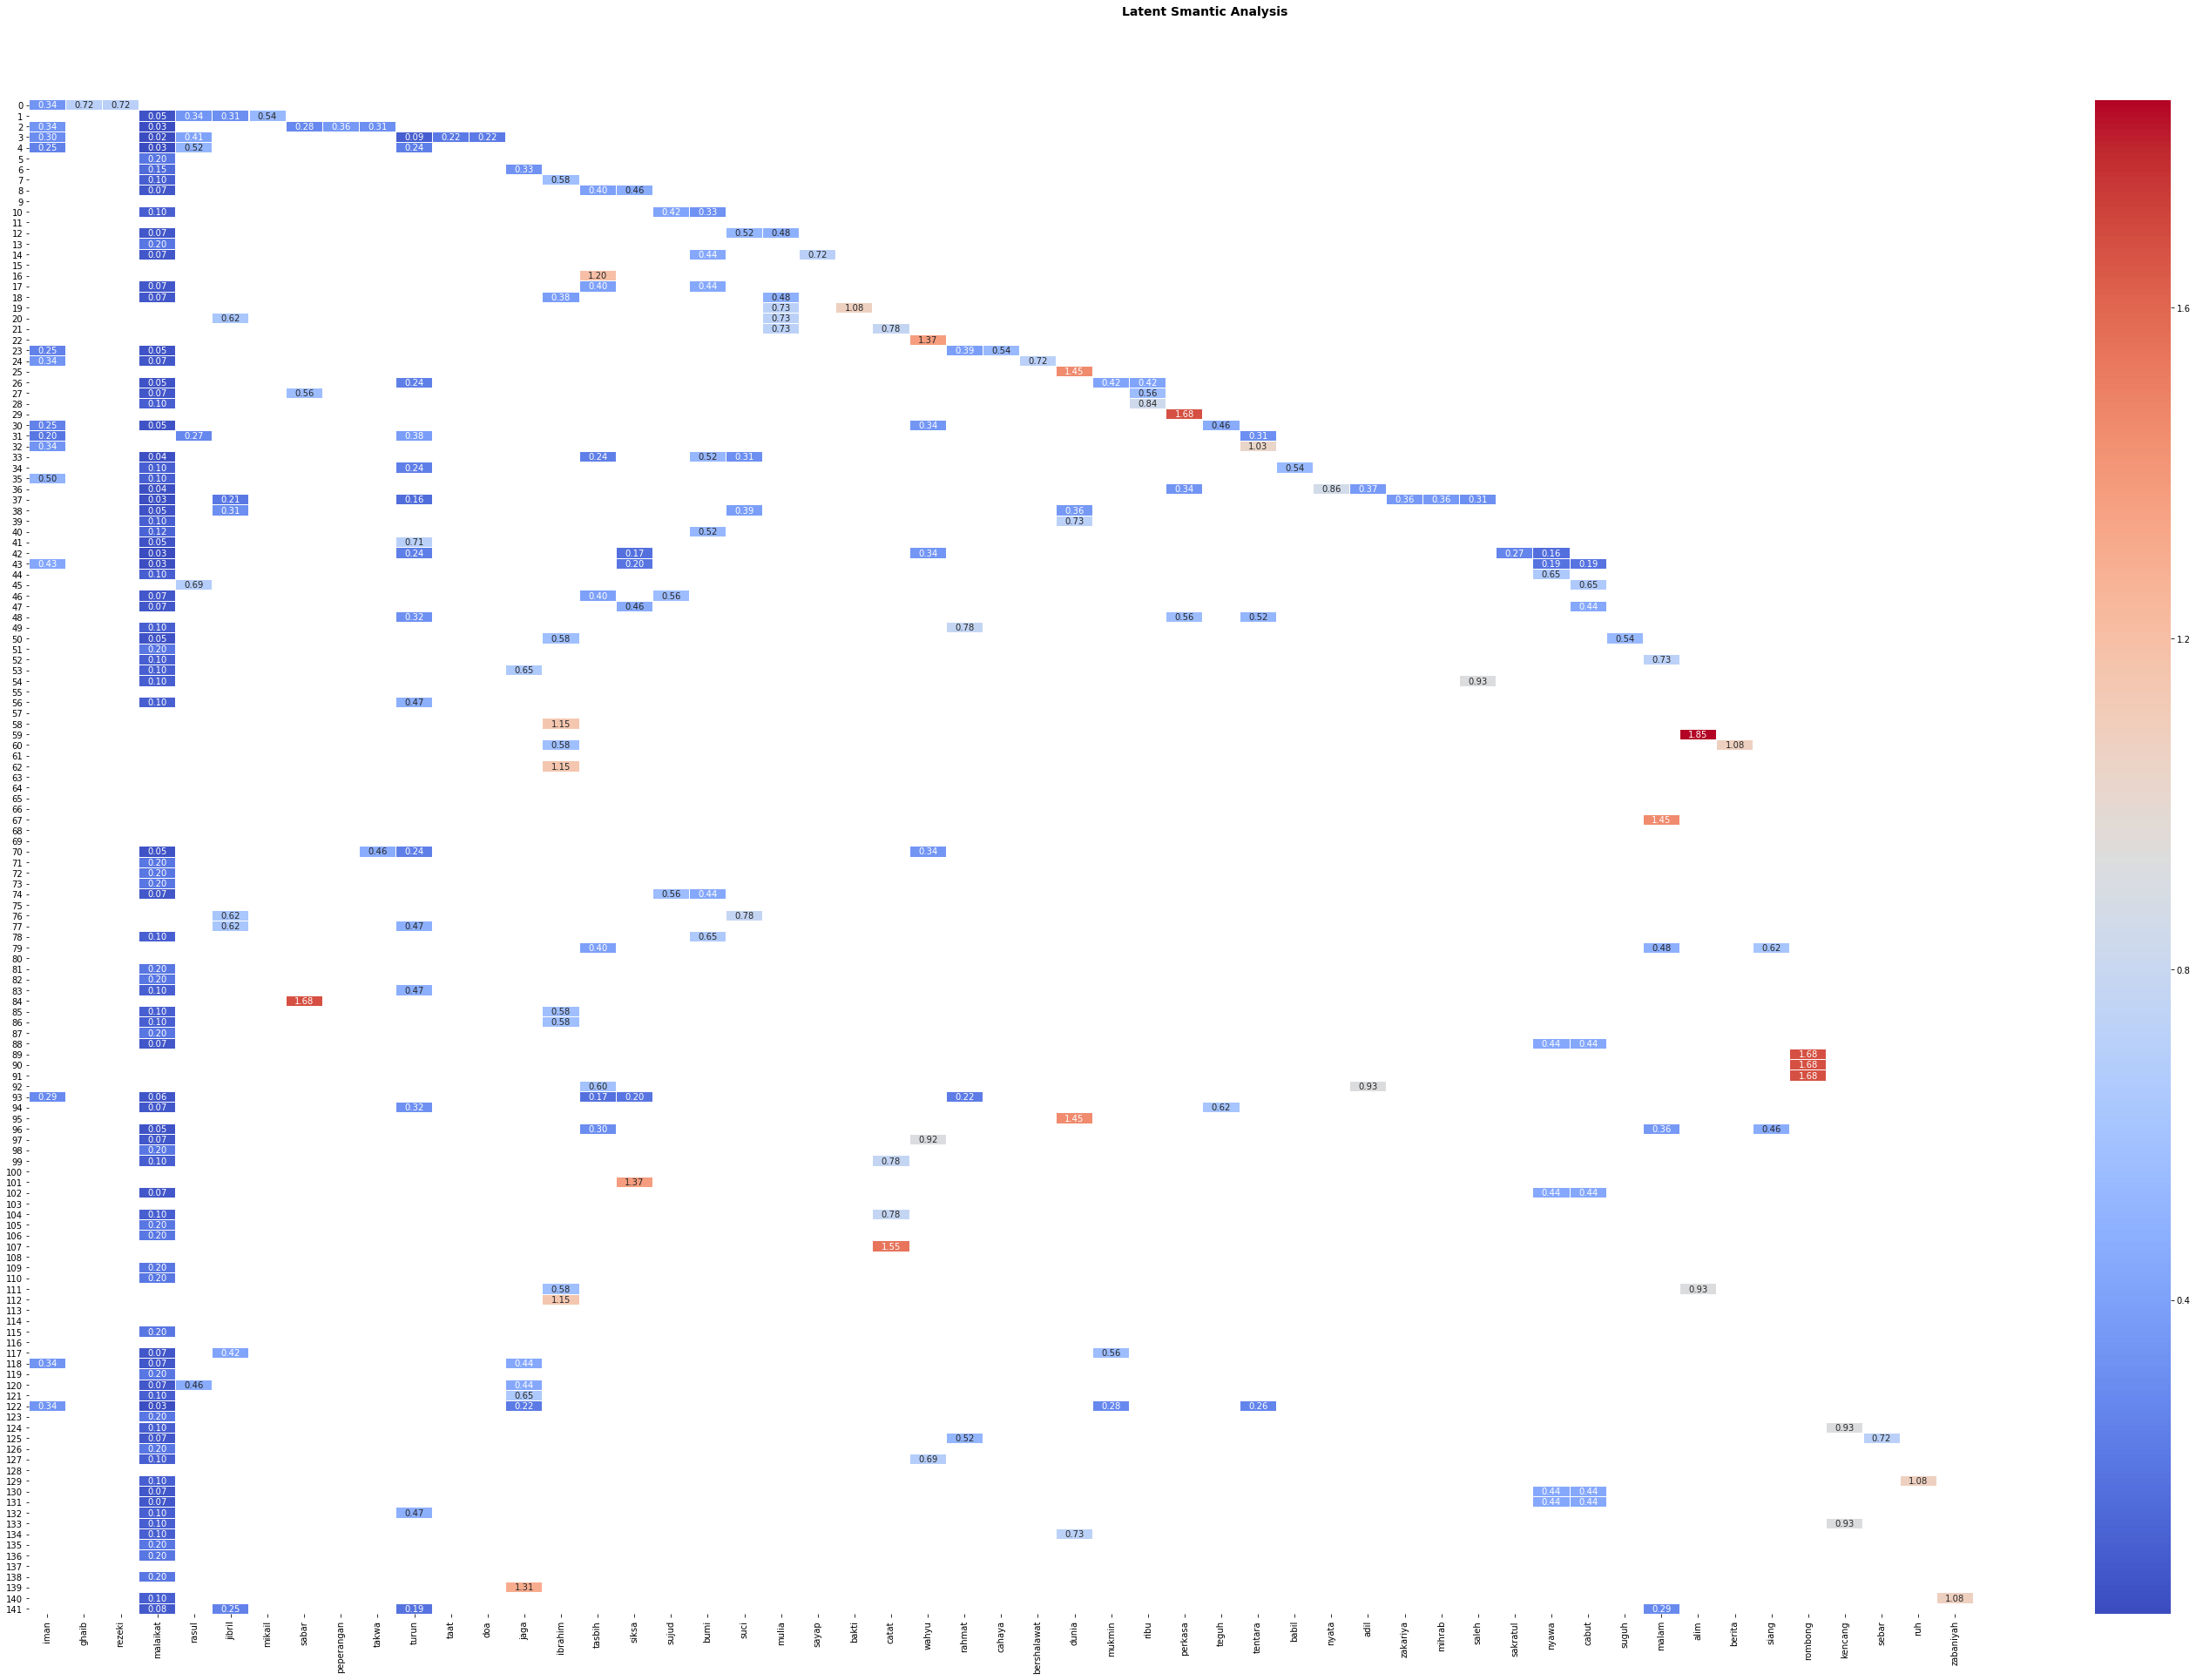

In [25]:
#menampilkan visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax) = plt.subplots(1, 1, figsize=(50,30))

hm = sns.heatmap(tfidf, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Latent Smantic Analysis', 
              fontsize=14, 
              fontweight='bold')

In [26]:
#menghitung bow
ArrayCount = []
for term in SetNull:
    count=0
    for row in posts['processed']:
        if term in row:
            count+=1
            kata = term,count
    ArrayCount.append(kata)  

In [27]:
#menghitung bow pada dokumen
Bow=list(ArrayCount)
Bow.sort()
# pd.DataFrame(Bow)

PROSES LATENT SIMANTIC ANALYSIS (LSA)

In [28]:
#membuat matrik tfidf
from scipy import sparse
tfidf.fillna(value=0,inplace=True)
sparse_matrix = sparse.csr_matrix(tfidf.values)

In [29]:
#menampilkan matrik
sparse_matrix.shape

(142, 53)

In [30]:
#library lsa
import sys
lsa = TruncatedSVD(n_components=6,n_iter=100)
lsa.fit(sparse_matrix)

TruncatedSVD(algorithm='randomized', n_components=6, n_iter=100,
             random_state=None, tol=0.0)

In [31]:
#melihat nilai singular
print(lsa.singular_values_)

[2.90147451 2.52364876 2.33021576 2.09172816 2.03747784 1.92097519]


In [32]:
#lsa consept
terms = tfidf
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse= True)[:8]
    print("KONSEP %d:" % i )
    for term in sortedTerms:
        print("{}".format(term[0]))
    print (" ")

KONSEP 0:
rombong
ibrahim
alim
berita
suguh
malaikat
mulia
catat
 
KONSEP 1:
ibrahim
alim
berita
suguh
malaikat
mulia
catat
dunia
 
KONSEP 2:
dunia
malaikat
jibril
suci
mulia
catat
turun
wahyu
 
KONSEP 3:
catat
mulia
malaikat
bakti
jibril
suci
turun
wahyu
 
KONSEP 4:
alim
catat
dunia
rombong
taat
doa
zakariya
mihrab
 
KONSEP 5:
wahyu
turun
malam
perkasa
malaikat
jaga
tasbih
iman
 


In [33]:
#menggabung fill dari lsa
ArrayLSA = []
for index, row in posts.iterrows():
    #print('Surah: {}, Ayat: {}, Text: {}'.format(row['Surah'], row['Ayat'], row['processed']))
    for term in SetNull:
        if term in row['processed']:
            kata=term,row['processed'],row['Surah'],row['Ayat']
            ArrayLSA.append(kata)    

In [34]:
#data csv
Bow=list(ArrayLSA)
Bow.sort()
# data= pd.DataFrame(Bow,columns=['Bag Of Word', 'Terjemahan', 'Surah', 'Ayat'])
# data.head(10)

In [35]:
#mengezip surat dan ayat
surahayatDict = {}
count = 0;
for row in zip(posts['Surah'], posts['Ayat']):       
    surahayatDict[count] = row
    count+=1

In [36]:
#mengezip Bag Of Word, surat dan ayat, nilai tf-idf
tfidfDict = {}
gabunganArray=[]
for index, row in tfidf.iterrows():
    for b, s in row.items():
        #print("index: {}, bow: {}, bobot: {}".format(surahayatDict[index], b, j))
        tfidfDict=b,surahayatDict[index],s
        if tfidfDict[2] != 0.0:
            gabunganArray.append(tfidfDict)
            #print(tfidfDict[2])
#print(tfidfDict[(2, 3), 'iman'])

In [37]:
#menampilkan bag of word
data = pd.DataFrame(gabunganArray,columns=['Bag Of Word','Surat & Ayat','TF-IDF'])
data.head(15)

,Bag Of Word,Surat & Ayat,TF-IDF
0,iman,"(2, 3)",0.335387
1,ghaib,"(2, 3)",0.717429
2,rezeki,"(2, 3)",0.717429
3,malaikat,"(2, 98)",0.050725
4,rasul,"(2, 98)",0.343534
5,jibril,"(2, 98)",0.312300
6,mikail,"(2, 98)",0.538072
7,iman,"(2, 177)",0.335387
8,malaikat,"(2, 177)",0.033816
9,sabar,"(2, 177)",0.279195


In [38]:
#menampilkan Bag Of Word Dengan Surah dan Ayat LSA
terms = tfidf
d={}
arayData={}
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse= True)[:8]
    print("KONSEP %d:" % i )
    jumlah=0
    for  term in sortedTerms:
        a=term[0]
        d[a] = [data['Surat & Ayat'][j] for j in data[data['Bag Of Word']==a].index]
        print("{}: {}:{}".format(a,d[a],len(d[a])))
    print(" ")

KONSEP 0:
rombong: [(37, 1), (37, 2), (37, 3)]:3
ibrahim: [(11, 70), (51, 24), (11, 69), (15, 52), (15, 54), (15, 57), (29, 31), (29, 32), (51, 28), (51, 31)]:10
alim: [(15, 53), (51, 28)]:2
berita: [(15, 54)]:1
suguh: [(11, 69)]:1
malaikat: [(2, 98), (2, 177), (2, 285), (4, 136), (37, 164), (6, 61), (11, 70), (13, 13), (16, 49), (21, 26), (21, 28), (35, 1), (42, 5), (51, 24), (33, 43), (33, 56), (3, 124), (3, 125), (8, 9), (8, 12), (2, 30), (2, 102), (2, 248), (3, 18), (3, 39), (3, 42), (3, 45), (4, 97), (4, 166), (6, 93), (6, 158), (7, 37), (7, 206), (8, 50), (10, 21), (11, 69), (11, 77), (11, 81), (13, 11), (13, 23), (15, 8), (16, 2), (16, 28), (16, 32), (16, 33), (16, 49), (21, 19), (21, 103), (22, 75), (25, 25), (29, 31), (29, 32), (29, 33), (32, 11), (40, 7), (41, 30), (41, 38), (42, 51), (43, 19), (43, 80), (47, 27), (50, 17), (50, 18), (50, 21), (50, 41), (51, 4), (54, 6), (66, 4), (66, 6), (69, 17), (72, 27), (74, 30), (74, 31), (77, 1), (77, 2), (77, 3), (77, 4), (77, 5), (78

In [39]:
#menampilkan BOW Dengan Surah dan Ayat Beserta Nilai TF-IDF LSA
terms = tfidf
d={}
arayData={}
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:8]
#     print("Concept %d:" % i )
    jumlah=0
    for  term in sortedTerms:
        a=term[0]
        d[a] = {data['Surat & Ayat'][j]:data['TF-IDF'][j] for j in data[data['Bag Of Word']==a].index}
#         print("{}: {}".format(a,d[a]))
#     print(" ")

In [40]:
#menampilkan Jumlah TF-IDF yang sesuai terjemahanya LSA
terms = tfidf
d={}
result = {}
jumlahArray=[]
import collections, functools, operator 
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:8]
    #print("Concept %d:" % i )
    counter = collections.Counter()
    for  term in sortedTerms:
        a=term[0]
        d = [{data['Surat & Ayat'][j]:data['TF-IDF'][j]} for j in data[data['Bag Of Word']==a].index] 
        #print("{} {} {}".format(a,d,len(d)))
        for s in d: 
            counter.update(s)
        result = dict(counter) 
    #print("\n")
    #print("Menjumlahkan Nilai TF-IDF Dari Surat & Ayat Yang Muncul Lebih Dari Satu \n")
    #print(str(result))
#     print(" ")

In [41]:
#membuat key dict sesuai consept LSA
terms = tfidf
d={}
result = {}
DataArrayTematik=[]
import collections, functools, operator 
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:8]
    print("KONSEP %d:" % i )
    counter = collections.Counter()
    for  term in sortedTerms:
        a=term[0]
        d = [{data['Surat & Ayat'][j]} for j in data[data['Bag Of Word']==a].index] 
        #print("{} {} {}".format(a,d,len(d)))
        for s in d: 
            counter.update(s)
        result = dict(counter)
    print("Menghapus Duplikat Data \n")
    print(sorted(result.keys()), len(result))
    print(" ")
    DataArrayTematik.append(sorted(result.keys()))

KONSEP 0:
Menghapus Duplikat Data 

[(2, 30), (2, 98), (2, 102), (2, 177), (2, 248), (2, 285), (3, 18), (3, 39), (3, 42), (3, 45), (3, 124), (3, 125), (4, 97), (4, 136), (4, 166), (6, 61), (6, 93), (6, 158), (7, 37), (7, 206), (8, 9), (8, 12), (8, 50), (10, 21), (11, 69), (11, 70), (11, 77), (11, 81), (13, 11), (13, 13), (13, 23), (15, 8), (15, 52), (15, 53), (15, 54), (15, 57), (16, 2), (16, 28), (16, 32), (16, 33), (16, 49), (21, 19), (21, 26), (21, 28), (21, 103), (22, 75), (25, 25), (29, 31), (29, 32), (29, 33), (32, 11), (33, 43), (33, 56), (35, 1), (37, 1), (37, 2), (37, 3), (37, 164), (40, 7), (41, 30), (41, 38), (42, 5), (42, 51), (43, 19), (43, 80), (47, 27), (50, 17), (50, 18), (50, 21), (50, 23), (50, 41), (51, 4), (51, 24), (51, 28), (51, 31), (54, 6), (66, 4), (66, 6), (69, 17), (72, 27), (74, 30), (74, 31), (77, 1), (77, 2), (77, 3), (77, 4), (77, 5), (78, 38), (79, 1), (79, 2), (79, 3), (79, 4), (79, 5), (80, 15), (80, 16), (81, 19), (82, 10), (82, 11), (83, 21), (96, 18

In [42]:
#menyimpan file ke csv
with open('Data_pengelompokan_LSA.csv', 'w',encoding='utf-8',newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(DataArrayTematik)
    print ("proses selesai")
csvFile.close()

proses selesai


In [43]:
#menampilkan Jumlah TF-IDF yang sesuai terjemahanya LSA nilai tf idf 0.5 teratas
terms = tfidf
d={}
result = {}
jumlahArray=[]
import collections, functools, operator 
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:8]
    #print("Concept %d:" % i )
    counter = collections.Counter()
    for  term in sortedTerms:
        seleksi = collections.Counter()
        a=term[0]
        d = [{data['Surat & Ayat'][j]:data['TF-IDF'][j]} for j in data[data['Bag Of Word']==a].index] 
        #print("{} {} {}".format(a,d,len(d)))
        for s in d: 
            counter.update(s)
        result = dict(counter)
        for key, value in result.items():
            if  value >= 0.5:
                sor= key,value
                seleksi.update(sor)
        hasil = dict(seleksi)
#     print("\n")
    #print("Menjumlahkan Surat & Ayat Yang Muncul Lebih Dari Satu \n")
#     print(str(result),"\n")
#     print(str(hasil))
#     print(" ")

EVALUASI PRECISION

In [44]:
#membaca data evaluasi
tema = pd.read_csv(open('Data_Malaikat_Tema.csv', newline='', encoding='utf-8'), delimiter=';')
#menampilkan dari fle csv
print (tema.shape)
tema.head(10)

(157, 4)


,tema,surah,ayat,terjemahan
0,Kewajiban Beriman Kepada Malaikat,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,..."
1,Kewajiban Beriman Kepada Malaikat,2,98,"Barang siapa yang menjadi musuh Allah, malaika..."
2,Kewajiban Beriman Kepada Malaikat,2,177,Bukanlah menghadapkan wajahmu ke arah timur da...
3,Kewajiban Beriman Kepada Malaikat,2,285,Rasul telah beriman kepada Al Quran yang ditur...
4,Kewajiban Beriman Kepada Malaikat,4,136,"Wahai orang-orang yang beriman, tetaplah berim..."
5,Kewajiban Beriman Kepada Malaikat,37,164,Tiada seorangpun di antara kami (malaikat) mel...
6,Sifat - Sifat Malaikat,6,61,Dan Dialah yang mempunyai kekuasaan tertinggi ...
7,Sifat - Sifat Malaikat,11,70,Maka tatkala dilihatnya tangan mereka tidak me...
8,Sifat - Sifat Malaikat,13,13,"Dan guruh itu bertasbih dengan memuji Allah, (..."
9,Sifat - Sifat Malaikat,15,62,"ia berkata: ""Sesungguhnya kamu adalah orang-or..."


In [45]:
#mengezip surat dan ayat = {}
dicsuahayat={}
count = 0;
for baris in zip(tema['surah'], tema['ayat']):       
    dicsuahayat[count] =baris
    count+=1

In [46]:
#menggabung tema,surah dan ayat,terjemahan
gabung={}
arraygabung=[]
for key,value in dicsuahayat.items():
    gabung  = tema['tema'][key], value, tema['terjemahan'][key]
    arraygabung.append(gabung)

In [48]:
#data cvs darat penggabungan 
subtema = pd.DataFrame(arraygabung,columns=['Sub Tema','Surah & Ayat', 'Terjemahan'])
subtema

,Sub Tema,Surah & Ayat,Terjemahan
0,Kewajiban Beriman Kepada Malaikat,"(2, 3)","(yaitu) mereka yang beriman kepada yang ghaib,..."
1,Kewajiban Beriman Kepada Malaikat,"(2, 98)","Barang siapa yang menjadi musuh Allah, malaika..."
2,Kewajiban Beriman Kepada Malaikat,"(2, 177)",Bukanlah menghadapkan wajahmu ke arah timur da...
3,Kewajiban Beriman Kepada Malaikat,"(2, 285)",Rasul telah beriman kepada Al Quran yang ditur...
4,Kewajiban Beriman Kepada Malaikat,"(4, 136)","Wahai orang-orang yang beriman, tetaplah berim..."
...,...,...,...
152,Tugas - Tugas Malaikat,"(82, 12)",mereka mengetahui apa yang kamu kerjakan.
153,Tugas - Tugas Malaikat,"(83, 21)",yang disaksikan oleh malaikat-malaikat yang di...
154,Tugas - Tugas Malaikat,"(86, 4)",tidak ada suatu jiwapun (diri) melainkan ada p...
155,Tugas - Tugas Malaikat,"(96, 18)","kelak Kami akan memanggil malaikat Zabaniyah,"


In [ ]:
#membuat dict subtema , surah dan ayat
tema={}
for a in subtema['Sub Tema']:
    tema[a] = [subtema['Surah & Ayat'][x] for x in subtema[subtema['Sub Tema']==a].index] 
for key, value in tema.items():
    print(key,value,len(value))

In [ ]:
# Evaluasi Precision, Recall, F1-Score
terms = tfidf
d={}
result = {}
jumlahArray=[]
import collections, functools, operator 
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:8]
    konsep="KONSEP %d"% i
    print(konsep.center(127, "*"),"\n")
    counter = collections.Counter()
    for  term in sortedTerms:
        a=term[0]
        d = [{data['Surat & Ayat'][j]} for j in data[data['Bag Of Word']==a].index] 
        #print("{} {} {}".format(a,d,len(d)))
        for s in d: 
            counter.update(s)
        result = dict(counter)
    #print(result.keys(), len(result.keys()))
    for key,value in tema.items():
        k = value
        hitung_value =len(k)
#         print(key,k)
        count=0
        jumlah=0
        precision=0
        recall=0
        f1score=0
        jumlah_tema=0
        for s in k:
            for d in result.keys():
                #print(d)
                if s == d:
                    #print(d)
                    count+=1
                    jumlah =len(result.keys())-count
                    #fn=jumlah data al-qur'an cordoba- data yang dikelompokan yang tepat.
                    jumlah_tema=hitung_value-count
                    #precision = jumlah surat dan ayat sama pada qordoba/ jumlah surat dan ayat yang tidak terdapat di qordoba
                    precision= count/(count+jumlah)*100
                    #recall = jumlah data dikelompokan / jumlah data yang sama + jumlah data dikelompokan
                    recall= count/(count+jumlah_tema)*100
                    f1score= 2*((precision*recall)/(precision+recall))
        gabungan = konsep,len(result.keys()),hitung_value,count,jumlah,jumlah_tema,'{:.2f}'.format(precision),'{:.2f}'.format(recall),'{:.2f}'.format(f1score)
        jumlahArray.append(gabungan)
        print(key,"\nSurat & Ayat Tepat :",count,"\nSurah & Ayat Tidak Tepat :",jumlah,"\nData Tematik Qordoba :",hitung_value,"\nPrecision :",'{:.2f}'.format(precision),"%","\nRecall :",'{:.2f}'.format(recall),"%","\nF1 Score :",'{:.2f}'.format(f1score),"%")
        print("".center(127, "-"),"\n")
    print(" ")

In [ ]:
#simpan ke csv
Data_Evaluasi=pd.DataFrame(jumlahArray)
with open('Data_Nilai_Evaluasi.csv', 'w',encoding='utf-8',newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(jumlahArray)
    print ("proses selesai")
csvFile.close()

In [ ]:
#Evaluasi F1-score terbaik
terms = tfidf
d={}
result = {}
ArrayTematik=[]
DataArrayTidakSama=[]
import collections, functools, operator 
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:8]
    konsep="******************************************************* KONSEP %d *******************************************************" % i
    print(konsep.center(127, "*"),"\n")
    counter = collections.Counter()
    for  term in sortedTerms:
        a=term[0]
        d = [{data['Surat & Ayat'][j]} for j in data[data['Bag Of Word']==a].index] 
        #print("{} {} {}".format(a,d,len(d)))
        
        for s in d: 
            counter.update(s)
        result = dict(counter)
        k = list(result.keys())
    #print(sorted(result.keys()), len(result))
    ArrayTematik.append(k)
    #print(result.keys(), len(result.keys()))
    for key,value in tema.items():
        hitung_value =len(value)
        count=0
        jumlah=0
        precision=0
        recall=0
        f1score=0
        l =0
        arrayn=[]
        jumlah_tema=0
        for s in value:
            arrayx=[]
            for d in result.keys():
                arrayx.append(d)
                if s==d:
                    #print(d)
                    arrayn.append(s)
                    count+=1
                    jumlah =len(result.keys())-count
                    jumlah_tema=hitung_value-count
                    precision= count/(count+jumlah)*100
                    recall= count/(count+jumlah_tema)*100
                    f1score= 2*((precision*recall)/(precision+recall))
    #merubah ke list data  
        liskunci=list(kunci for kunci in arrayx)
        liscek = list(cek for cek in arrayn)
        
    #print(sorted(liskunci), len(liskunci))
    #print(sorted(liscek), len(liscek))
    
    #remove data yang sama
        for setcek in liscek:
            liskunci.remove(setcek)
                    
        if float(f1score) >76:
            DataArrayTidakSama.append(liskunci)
            print(" DATA TEMATIK LSA ".center(127, "-"))
            print(sorted(result.keys()), len(result),"\n\n")
            print(" DATA TRUE POSITIF ".center(127, "-"))
            print("Data Sama",sorted(arrayn),len(arrayn),"\n\n")
            print(" DATA FALSE NEGATIF ".center(127, "-"))
            print("DATA TIDAK SAMA ",liskunci,len(liskunci),"\n\n")
            print(" PERHITUNGAN EVALUASI ".center(127, "-"))
            print(key,"\nSurat & Ayat Tepat :",count,"\nSurah & Ayat Tidak Tepat :",jumlah,"\nData Tematik Qordoba :",hitung_value,"\nPrecision:",'{:.2f}'.format(precision),"%","\nRecall:",'{:.2f}'.format(recall),"%","\nF1 Score :",'{:.2f}'.format(f1score),"%")
            print("".center(127, "-"))
    print(" ")

In [ ]:
#membuat aray data presicion
Array_Data_TF=[]
Array_data_akhir=[]
Array_data=[]
Array_Data_Komplek=[]
for data_tidak_sama in DataArrayTidakSama:
    for set_data in data_tidak_sama:
        Array_Data_TF.append(set_data)

set_data_akhir=list(dict.fromkeys(Array_Data_TF))
Array_data_akhir.append(set_data_akhir)
for baris in Array_data_akhir:
    for kolom in baris:
        Array_data.append(kolom)
        
#panggil data
DataTerjemahan={}
for a in subtema['Surah & Ayat']:
    for x in subtema[subtema['Surah & Ayat']==a].index:
        DataTerjemahan[a] = subtema['Terjemahan'][x] 
    
for baris in Array_data:
    for key,value in DataTerjemahan.items():
        if baris == key:
            Array_Data_Komplek.append((baris,value))
    

In [ ]:
#menampilkan data csv hasil akkhir
pd.DataFrame(Array_Data_Komplek, columns=['Surah & Ayat', 'Terjemahan'])

In [ ]:
#menyimpan file ke csv
with open('Data_Evaluasi_Tematik.csv', 'w',encoding='utf-8',newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(Array_Data_Komplek)
    print ("proses selesai")
csvFile.close()

CSS UNTUK DATAFRAME

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>